In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sys.path.insert(0,os.path.dirname(os.getcwd()))
import effMap as ef

In [2]:
data = pd.read_csv('..\\Data\\test_data.csv')
data.dropna(subset=['Forward Speed', 'Reverse Speed', 'Volumetric at 1780RPM'], inplace=True)
speeds = data[['Forward Speed', 'Reverse Speed']].astype(float)
speeds = speeds.stack()
vol_eff = speeds / 1780 * 1e2

2020-08-26 16:05:31.894 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-08-26 16:05:31.894 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
piston_max = 1.1653 * 25.4 * 1e-3
piston_min = 1.1650 * 25.4 * 1e-3
bore_max = 1.1677 * 25.4 * 1e-3
bore_min = 1.1671 * 25.4 * 1e-3
rad_clearance_max = (bore_max - piston_min) / 2
rad_clearance_min = (bore_min - piston_max) / 2

In [4]:
benchmark = ef.HST(disp=196,swash=15,oil='SAE 30', oil_temp=60)
benchmark.compute_sizes(k1=.7155, k2=.9017, k3=.47, k4=.9348, k5=.9068)
eff_min = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_max)
eff_max = benchmark.compute_eff(speed_pump=1780, pressure_discharge=207, pressure_charge=14,h3=rad_clearance_min)

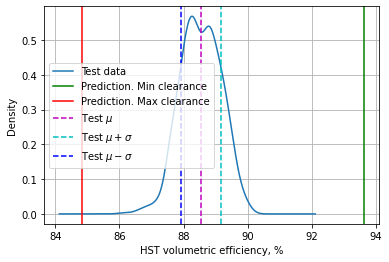

In [5]:
vol_eff.plot(kind='kde',grid=True,label='Test data')
plt.axvline(eff_max['hst']['volumetric'],linestyle='-',label='Prediction. Min clearance',color='g')
plt.axvline(eff_min['hst']['volumetric'],linestyle='-',label='Prediction. Max clearance',color='r')
plt.axvline(vol_eff.mean(),linestyle='--',label='Test $\mu$',color='m')
plt.axvline(vol_eff.mean()+vol_eff.std(),linestyle='--',label='Test $\mu + \sigma$',color='c')
plt.axvline(vol_eff.mean()-vol_eff.std(),linestyle='--',label='Test $\mu - \sigma$',color='b')
plt.xlabel('HST volumetric efficiency, %')
# plt.ylim(0, 100)
plt.legend()

In [6]:
import plotly.figure_factory as ff

fig = ff.create_distplot([vol_eff],['Test data'],show_hist=True,bin_size=.3,show_rug=False)
fig.add_scatter(
    x=[eff_max['hst']['volumetric'],eff_max['hst']['volumetric']],
    y=[0,.6],
    mode='lines',
    name='Prediciton. Min clearance',
    )
fig.add_scatter(
    x=[eff_min['hst']['volumetric'],eff_min['hst']['volumetric']],
    y=[0,.6],
    mode='lines',
    name='Prediciton. Max clearance',
    )
fig.add_scatter(
    x=[vol_eff.mean(),vol_eff.mean()],
    y=[0,.6],
    mode='lines',
    name='Test mean',
    )
fig.add_scatter(
    x=[vol_eff.mean()+vol_eff.std(),vol_eff.mean()+vol_eff.std()],
    y=[0,.6],
    mode='lines',
    name=r'$\mu + \sigma$',
    )
fig.add_scatter(
    x=[vol_eff.mean()-vol_eff.std(),vol_eff.mean()-vol_eff.std()],
    y=[0,.6],
    mode='lines',
    name=r'$\mu - \sigma$',
    )
fig.update_layout(
    title=f'Validation of the HST efficiency model the {benchmark.displ} cc/rev benchmark HST, {benchmark.oil} at {benchmark.oil_temp}C',
    width=700,
    height=600,
    xaxis=dict(
        title='HST volumetric efficiency, %',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[82, 94]
        ),
    yaxis=dict(
        title='Probability density',
        showline=True,
        linecolor='black',
        mirror=True,
        showgrid=True,
        gridcolor='LightGray',
        gridwidth=0.25,
        linewidth=0.5,
        range=[0, .6]
        ),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,0)',
    showlegend=True,
    legend_orientation='h',
    legend=dict(x=0, y=-.1))
fig.show()
# py.iplot(fig,filename='latex')

In [7]:
len(vol_eff)

764